In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from IPython.display import display
import os
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn import preprocessing,cross_validation,ensemble,metrics,svm,grid_search,decomposition,feature_selection,linear_model
import seaborn as sns

In [2]:
#set current working directory 
cwd = os.getcwd()
os.chdir("C:/Users/mukul")

#read test and train datasets
statefarm_df  = pd.read_csv("./Desktop/Allstate_train.csv")
statefarm_df_test  = pd.read_csv("./Desktop/Allstate_test.csv")

#change column names for better user readbility
statefarm_df.rename(columns={'X1': 'Interest_Rate', 'X2': 'Loan_ID','X3': 'Borrower_ID','X4': 'Loan_Amount_Req','X5': 'Loan_Amount_Funded','X6': 'Investor_Funded_Portion','X7': 'No_of_Payments','X8': 'Loan_Grade','X9': 'Loan_Sub_Grade','X10': 'Job_Title','X11': 'No_Years_employed','X12': 'Home_ownership_status','X13': 'Annual_Income','X14': 'Income_Source','X15': 'Loan_Issuance_Date','X16': 'Need_for_Loan','X17': 'Loan_Category','X18': 'Loan_Title','X19': 'Zip_3','X20': 'State_B','X21': 'Ratio_extra_debt_income','X22': 'No_Default_Last_30_days','X23': 'First_Credit_line_opened','X24': 'No_of_Inquiries_creditors_last_6_months','X25': 'No_months_Since_last_default','X26': 'Months_last_public_record','X27': 'Open_credit_lines','X28': 'No_bad_public_records','X29': 'Total_credit_revolving_balance','X30': 'Creditline_utilization_rate','X31': 'Total_Credit_lines','X32': 'Loan_Initial_Status'},inplace=True)
statefarm_df_test.rename(columns={'X1': 'Interest_Rate', 'X2': 'Loan_ID','X3': 'Borrower_ID','X4': 'Loan_Amount_Req','X5': 'Loan_Amount_Funded','X6': 'Investor_Funded_Portion','X7': 'No_of_Payments','X8': 'Loan_Grade','X9': 'Loan_Sub_Grade','X10': 'Job_Title','X11': 'No_Years_employed','X12': 'Home_ownership_status','X13': 'Annual_Income','X14': 'Income_Source','X15': 'Loan_Issuance_Date','X16': 'Need_for_Loan','X17': 'Loan_Category','X18': 'Loan_Title','X19': 'Zip_3','X20': 'State_B','X21': 'Ratio_extra_debt_income','X22': 'No_Default_Last_30_days','X23': 'First_Credit_line_opened','X24': 'No_of_Inquiries_creditors_last_6_months','X25': 'No_months_Since_last_default','X26': 'Months_last_public_record','X27': 'Open_credit_lines','X28': 'No_bad_public_records','X29': 'Total_credit_revolving_balance','X30': 'Creditline_utilization_rate','X31': 'Total_Credit_lines','X32': 'Loan_Initial_Status'},inplace=True)

#drop unwanted text containing columns
statefarm_df.drop(['Job_Title','Need_for_Loan','Loan_Title'], axis=1, inplace=True)
statefarm_df_test.drop(['Job_Title','Need_for_Loan','Loan_Title'], axis=1, inplace=True)

#check final dtype of each variable 
statefarm_df.info()
statefarm_df_test.info()

C:\Users\mukul\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2723: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 29 columns):
Interest_Rate                              338990 non-null float64
Loan_ID                                    399999 non-null float64
Borrower_ID                                399999 non-null float64
Loan_Amount_Req                            399999 non-null float64
Loan_Amount_Funded                         399999 non-null float64
Investor_Funded_Portion                    399999 non-null float64
No_of_Payments                             399999 non-null object
Loan_Grade                                 338730 non-null object
Loan_Sub_Grade                             338730 non-null object
No_Years_employed                          399999 non-null object
Home_ownership_status                      338639 non-null object
Annual_Income                              338972 non-null float64
Income_Source                              399999 non-null object
Loan_Issuance_Date      

In [3]:
#Feature Engineering 

statefarm_df['Monthly_Income']=statefarm_df['Annual_Income']/12

statefarm_df.columns.values

statefarm_df_test['Monthly_Income']=statefarm_df_test['Annual_Income']/12


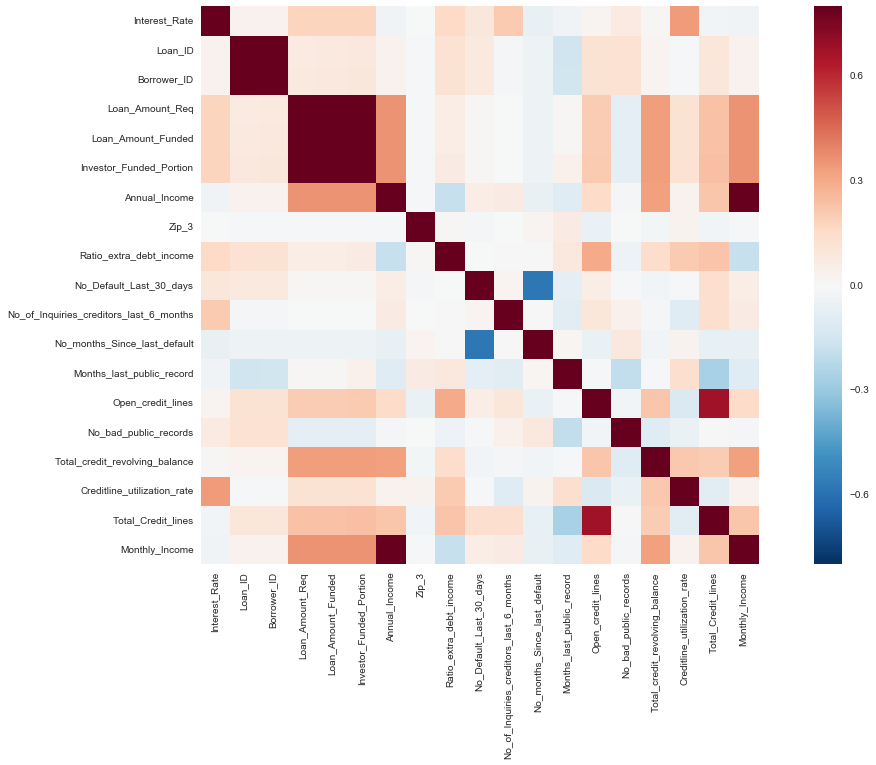

In [61]:
# check correlation among numerical variables and remove the ones that are correalted    

d = statefarm_df
corrmat = d.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 10))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True)




In [4]:
#preprocessing and transformation
#drop correlated columns
statefarm_df.drop(['Borrower_ID','Loan_Amount_Funded','Investor_Funded_Portion','Open_credit_lines'], axis=1, inplace=True)
statefarm_df_test.drop(['Borrower_ID','Loan_Amount_Funded','Investor_Funded_Portion','Open_credit_lines'], axis=1, inplace=True)

# Separate Numerical and Catergorical Variables for further processing
le = preprocessing.LabelEncoder()
train_str = statefarm_df.select_dtypes(include=['object','datetime64[ns]'])
test_str = statefarm_df_test.select_dtypes(include=['object','datetime64[ns]']) 
display(train_str.head())
print(train_str.columns.values)
print(test_str.columns.values)

#Get Numerical Variables only 
statefarm_df.drop(train_str.columns.values,axis=1,inplace=True)
statefarm_df_test.drop(train_str.columns.values,axis=1,inplace=True)

,No_of_Payments,Loan_Grade,Loan_Sub_Grade,No_Years_employed,Home_ownership_status,Income_Source,Loan_Issuance_Date,Loan_Category,State_B,First_Credit_line_opened,Loan_Initial_Status
0,36 months,B,B4,< 1 year,RENT,VERIFIED - income,Aug-09,debt_consolidation,CA,Feb-94,f
1,36 months,B,B5,< 1 year,RENT,not verified,May-08,credit_card,NY,Oct-00,f
2,36 months,D,D3,1 year,RENT,VERIFIED - income,Aug-14,debt_consolidation,NY,Jun-00,f
3,36 months,C,C2,10+ years,OWN,not verified,Mar-10,debt_consolidation,TX,Jan-85,f
4,36 months,C,C3,6 years,RENT,not verified,Nov-09,debt_consolidation,CT,Dec-96,f


['No_of_Payments' 'Loan_Grade' 'Loan_Sub_Grade' 'No_Years_employed'
 'Home_ownership_status' 'Income_Source' 'Loan_Issuance_Date'
 'Loan_Category' 'State_B' 'First_Credit_line_opened' 'Loan_Initial_Status']
['No_of_Payments' 'Loan_Grade' 'Loan_Sub_Grade' 'No_Years_employed'
 'Home_ownership_status' 'Income_Source' 'Loan_Issuance_Date'
 'Loan_Category' 'State_B' 'First_Credit_line_opened' 'Loan_Initial_Status']


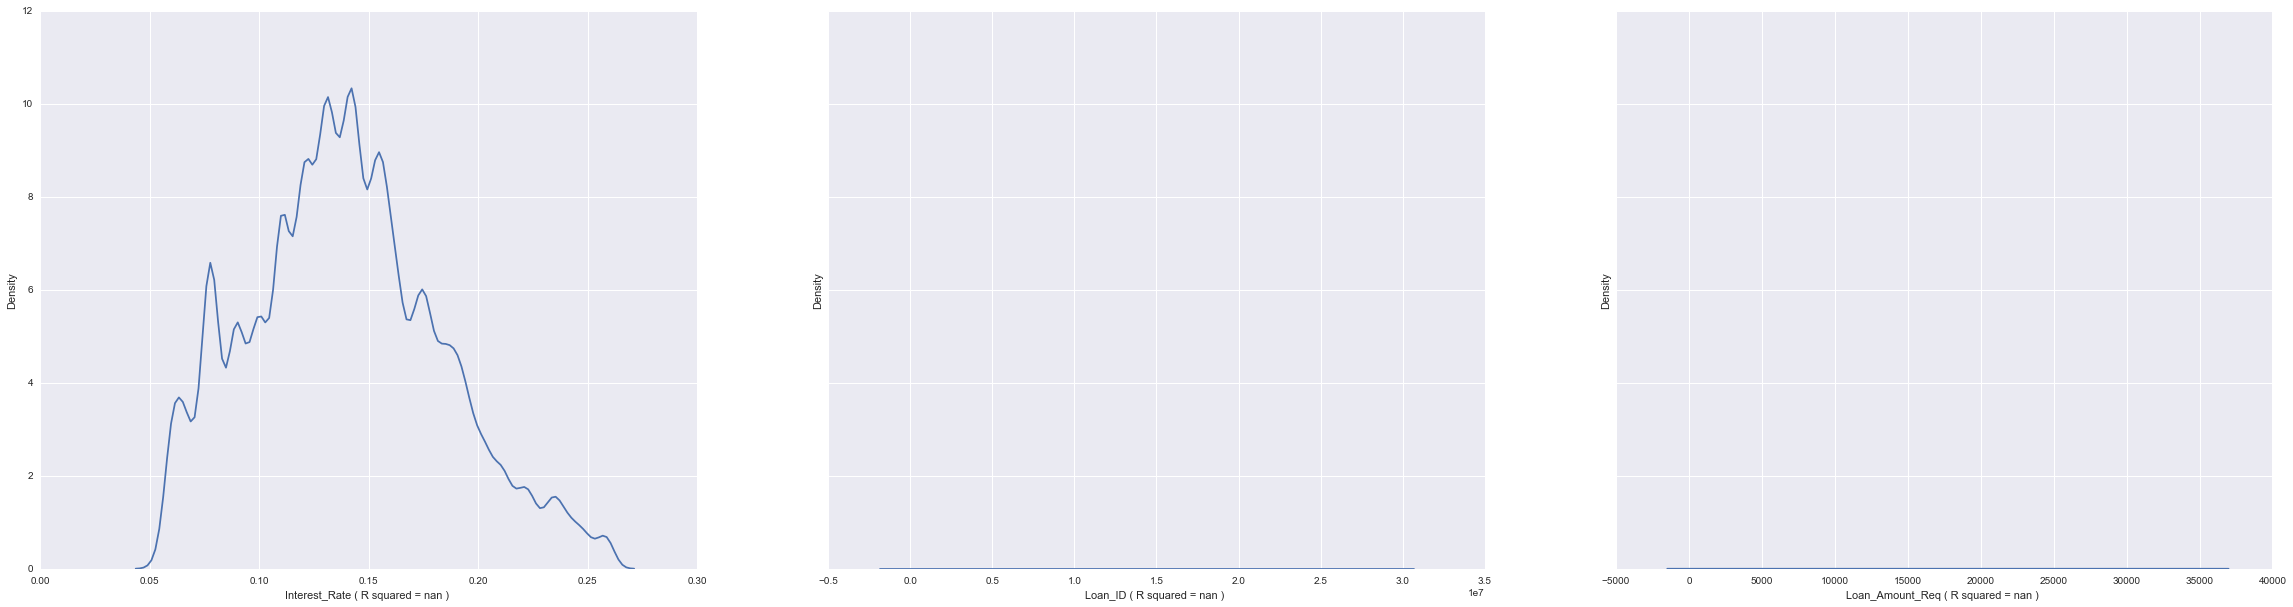

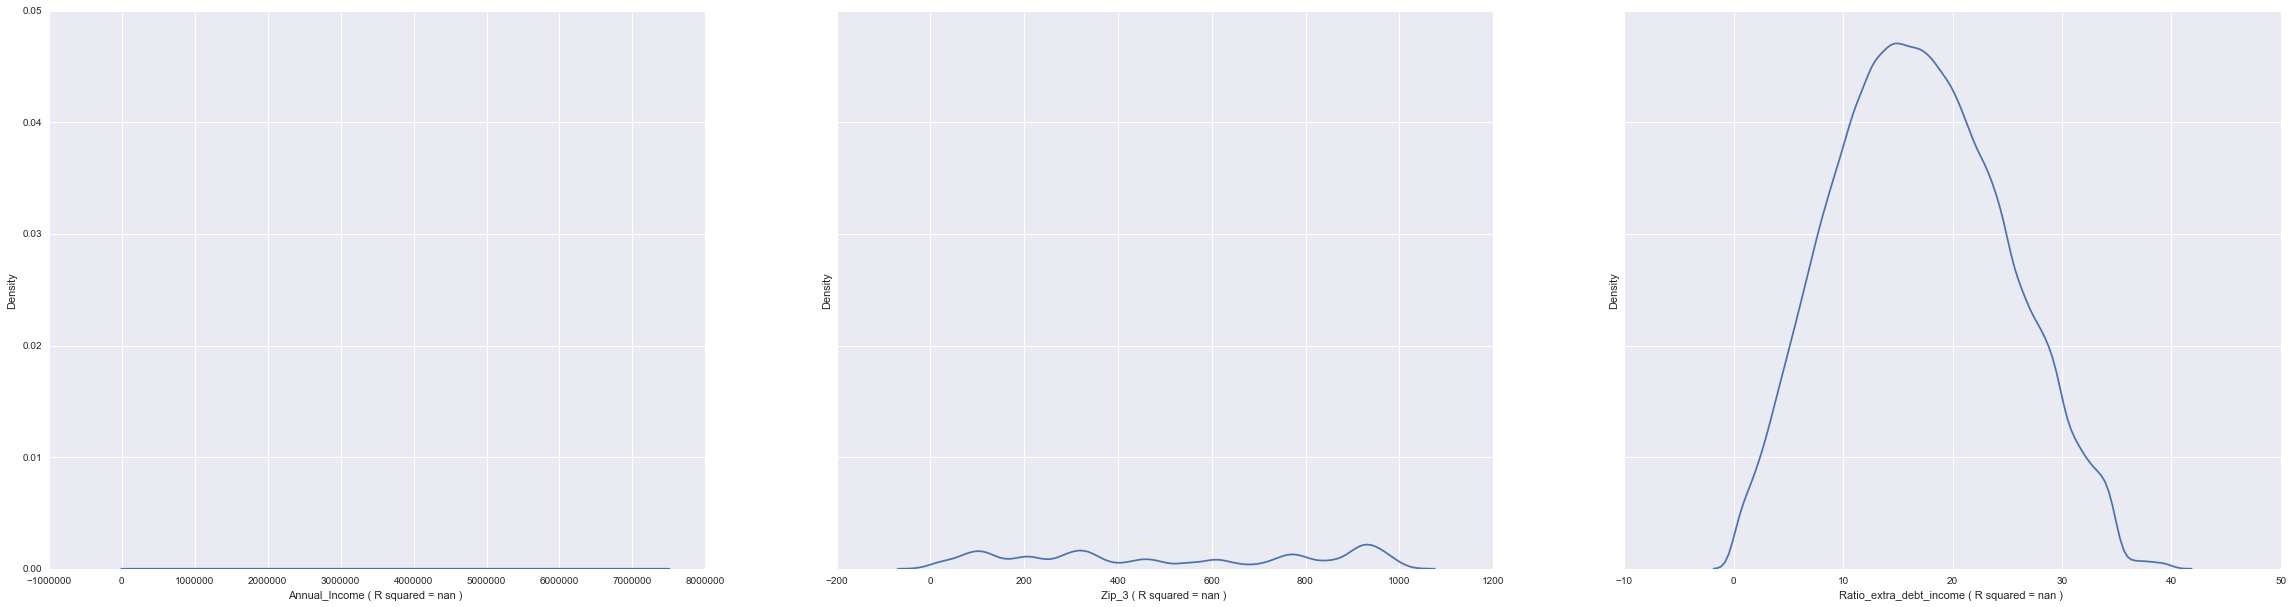

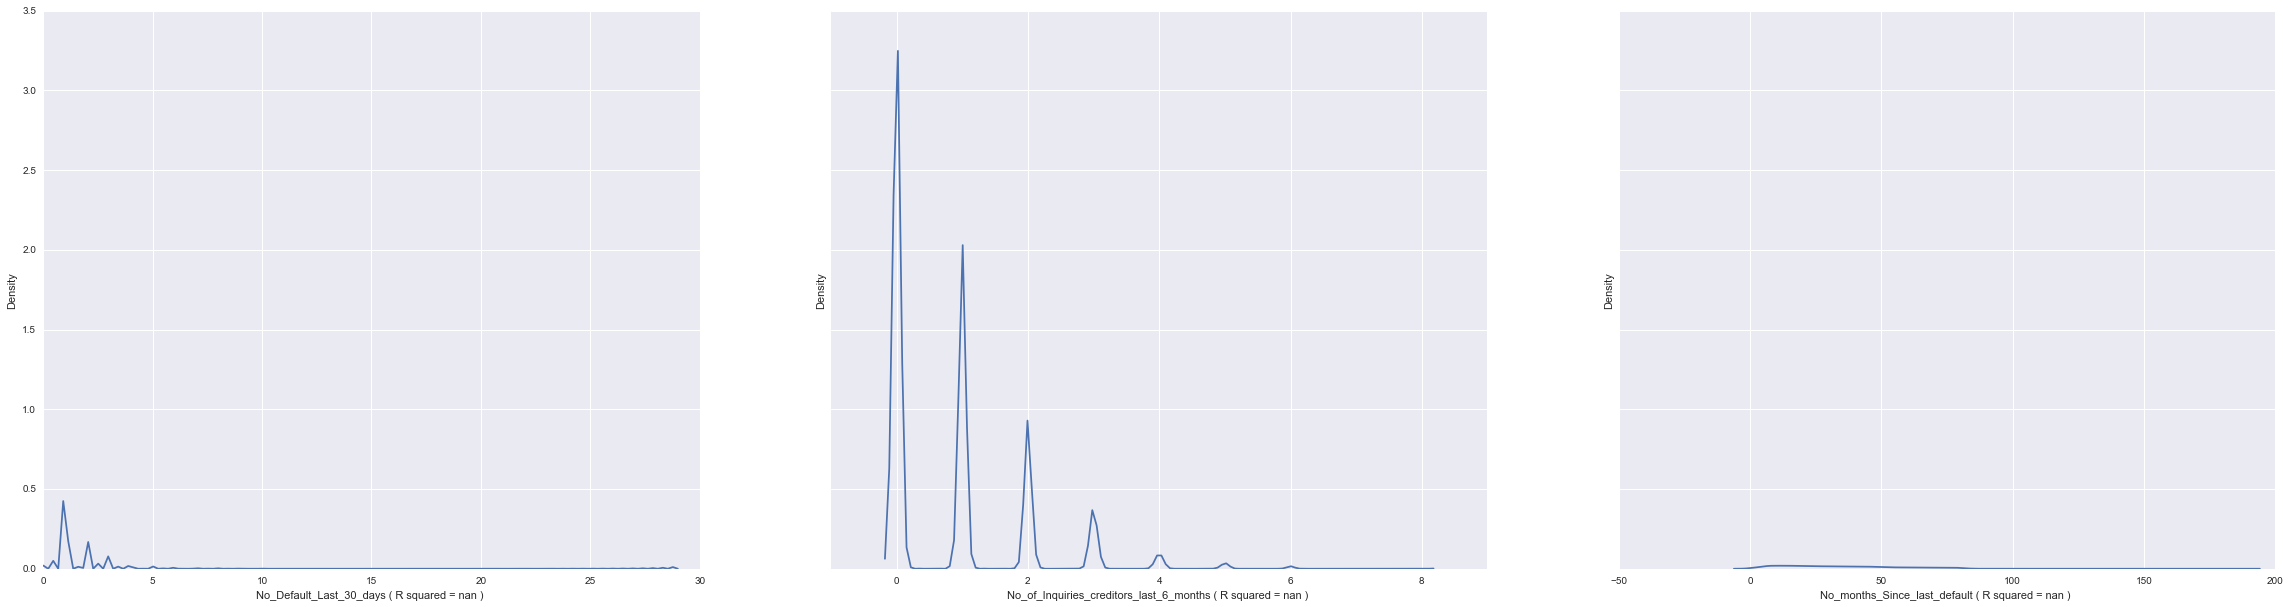

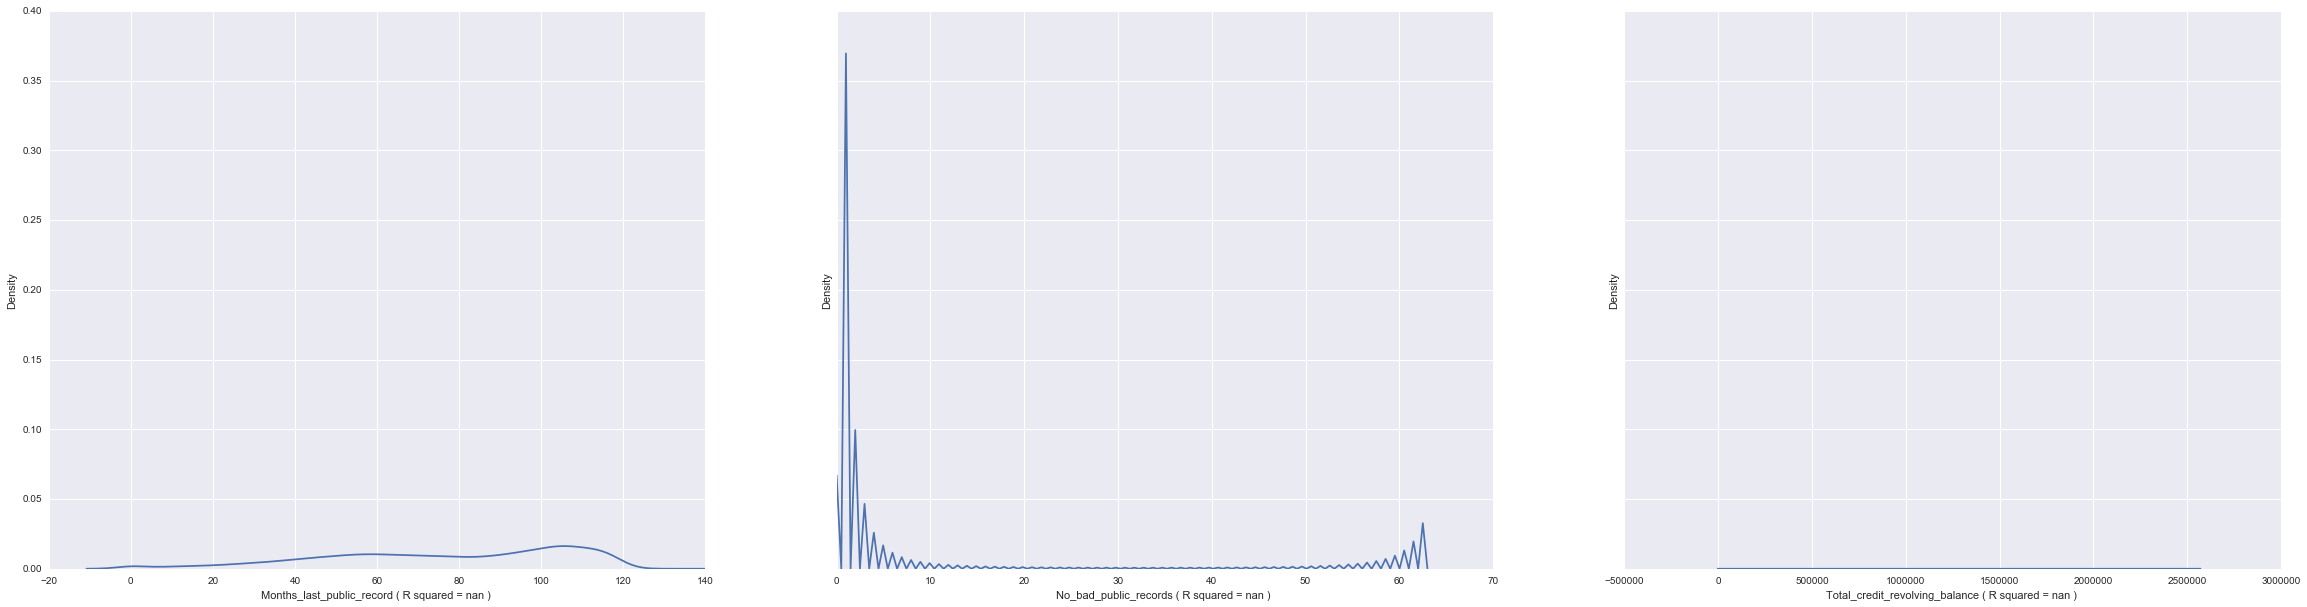

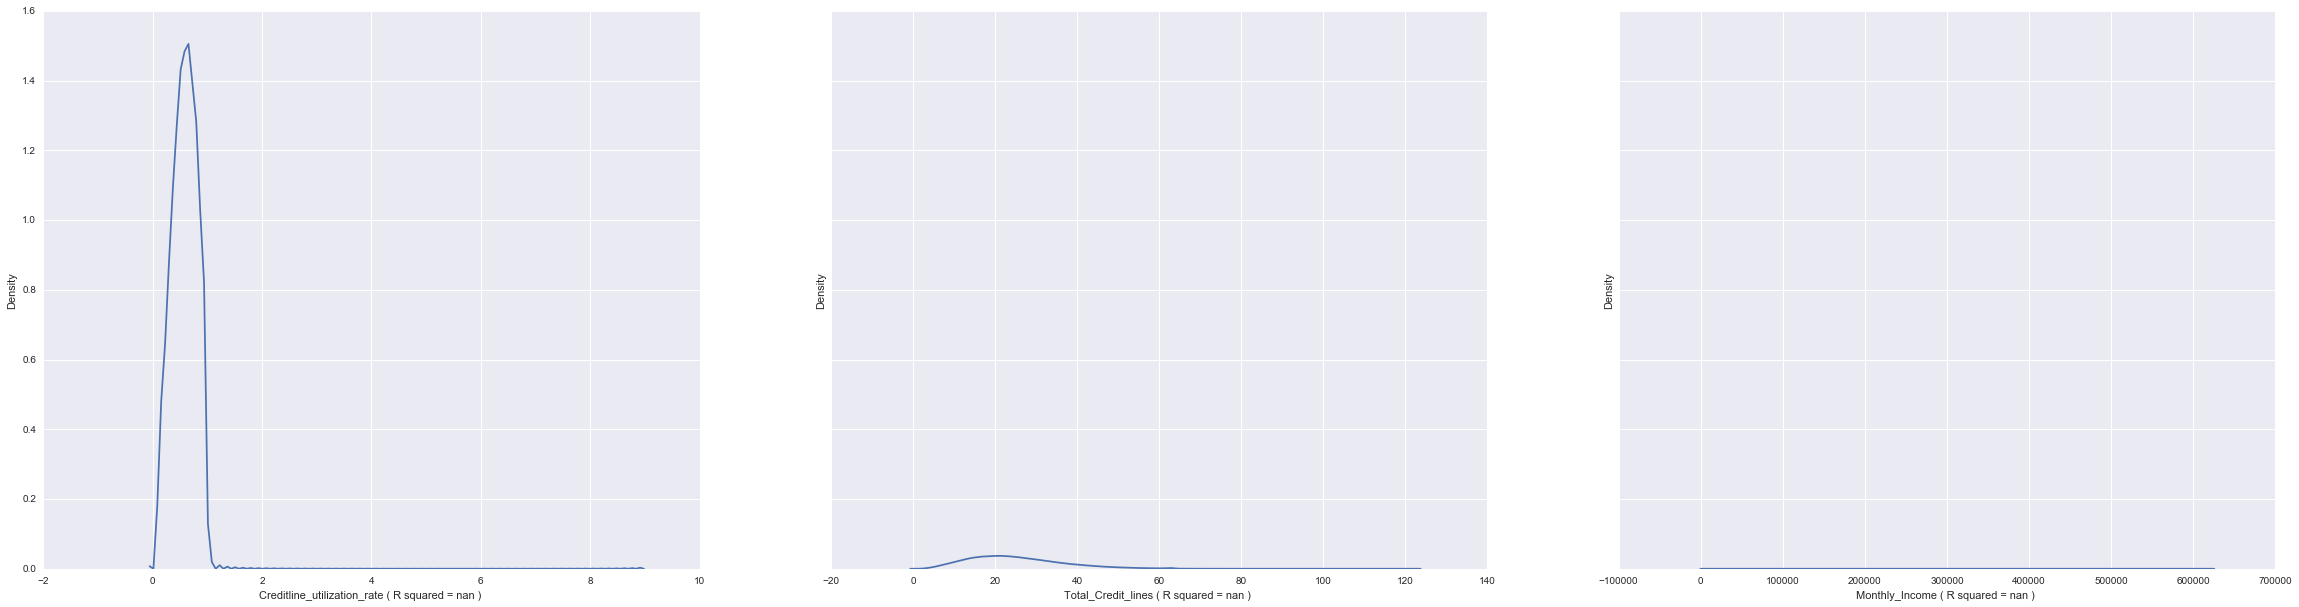

In [68]:
#EDA
#univariate analysis - Plots
ncol = 3
nrow = 5
for i in range(nrow):
    fig,axs = plt.subplots(nrows=1,ncols=ncol,sharey=True,figsize=(40, 10))
    cols = statefarm_df.columns[i*ncol:ncol*(i+1)]
    for i in range(len(axs)):
        sns.distplot(statefarm_df[cols[i]], ax=axs[i], hist=False)
        xlabel=cols[i]+" ( R squared = "+str(round(np.corrcoef(statefarm_df.Interest_Rate, statefarm_df[cols[i]])[0,1],2))+" ) "
        axs[i].set(xlabel=xlabel, ylabel='Density')

IndexError: index 2 is out of bounds for axis 0 with size 2

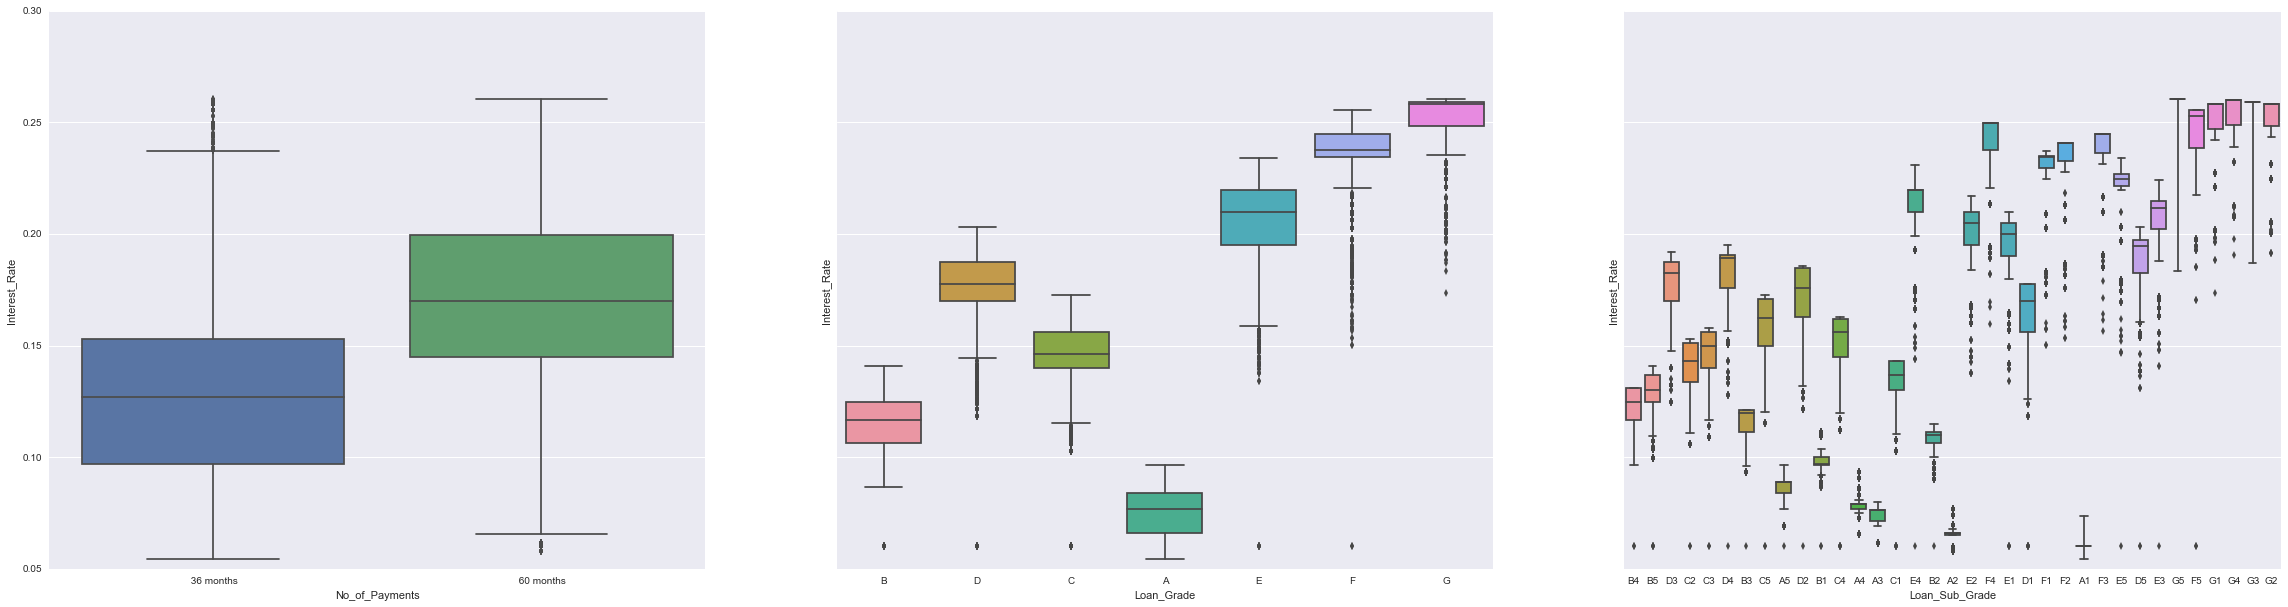

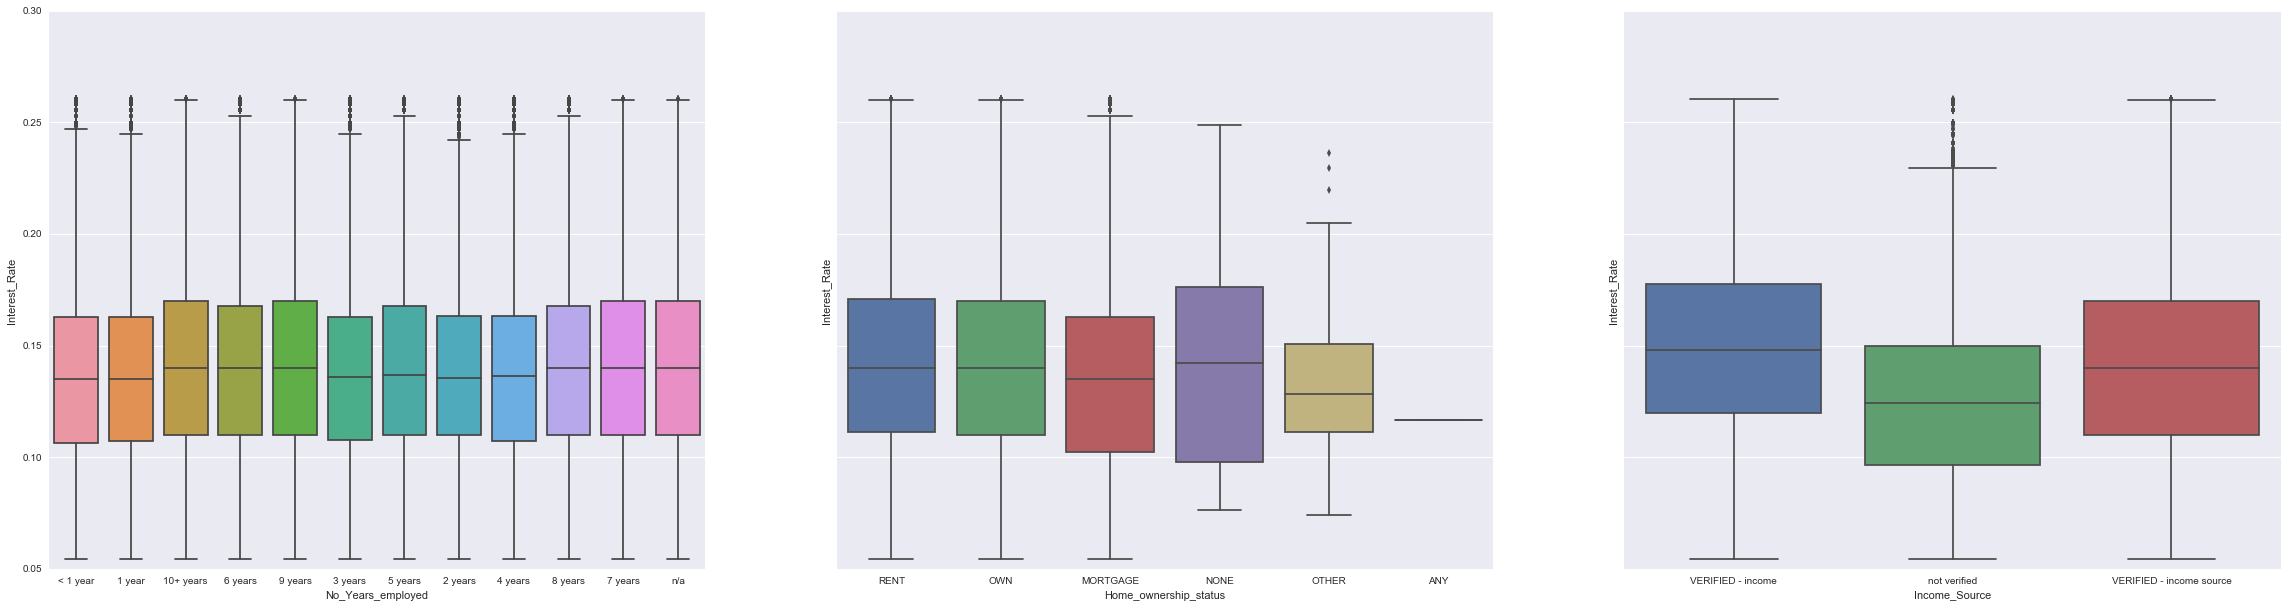

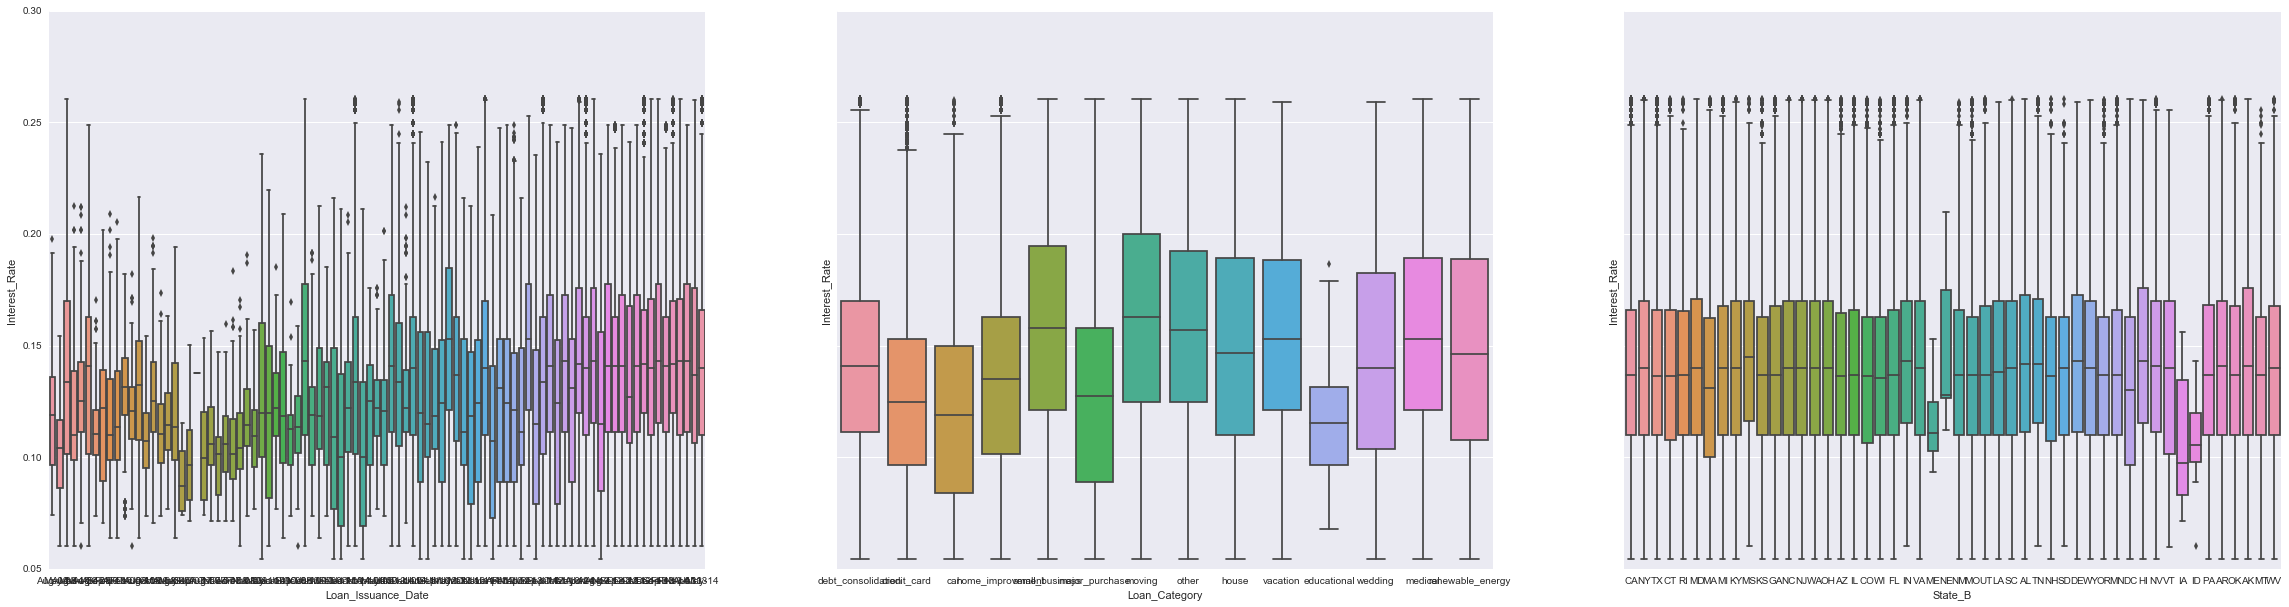

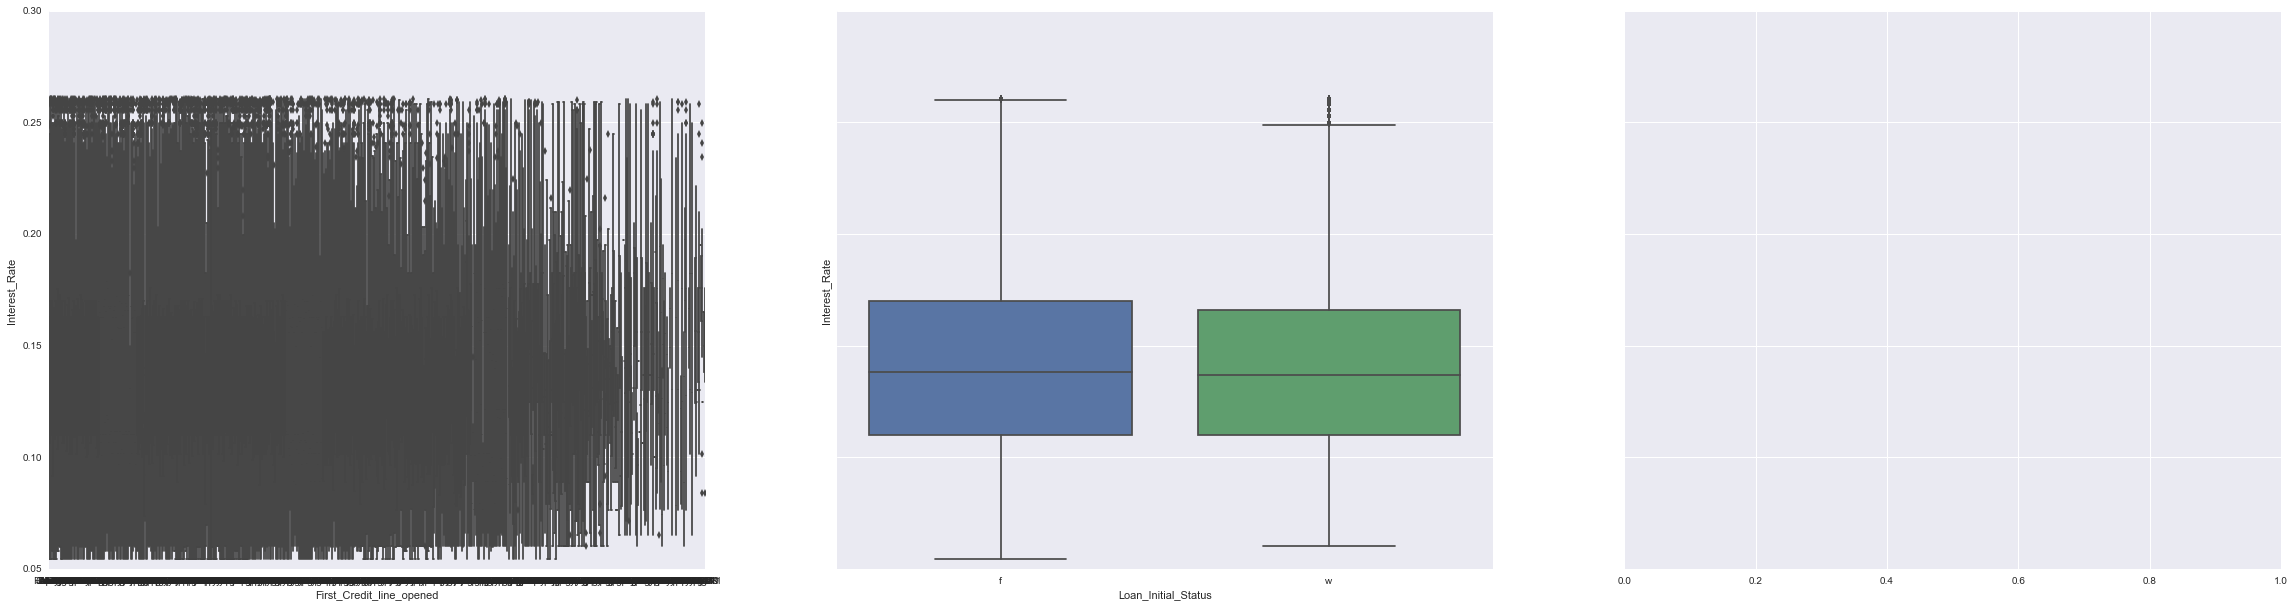

In [70]:
#Bivariate Analysis -Plots

for i in range(nrow):
    fig,axs = plt.subplots(nrows=1,ncols=ncol,sharey=True,figsize=(40, 10))
    cols =train_str.columns[i*ncol:ncol*(i+1)]
    for i in range(len(axs)):
        axs[i].set(yscale="linear")
        sns.boxplot(x=cols[i],y=statefarm_df.Interest_Rate , data=train_str, ax=axs[i])
        axs[i].set(xlabel=cols[i], ylabel='Interest_Rate')


In [69]:
#check column names 
print(statefarm_df.columns.values)
print(statefarm_df_test.columns.values)

['Interest_Rate' 'Loan_ID' 'Loan_Amount_Req' 'Annual_Income' 'Zip_3'
 'Ratio_extra_debt_income' 'No_Default_Last_30_days'
 'No_of_Inquiries_creditors_last_6_months' 'No_months_Since_last_default'
 'Months_last_public_record' 'No_bad_public_records'
 'Total_credit_revolving_balance' 'Creditline_utilization_rate'
 'Total_Credit_lines' 'Monthly_Income']
['Interest_Rate' 'Loan_ID' 'Loan_Amount_Req' 'Annual_Income' 'Zip_3'
 'Ratio_extra_debt_income' 'No_Default_Last_30_days'
 'No_of_Inquiries_creditors_last_6_months' 'No_months_Since_last_default'
 'Months_last_public_record' 'No_bad_public_records'
 'Total_credit_revolving_balance' 'Creditline_utilization_rate'
 'Total_Credit_lines']


In [5]:
#imputation Numeric variables 
from sklearn.base import TransformerMixin
class DataFrameImputer(TransformerMixin):
    def fit(self, X, y=None):
        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].mean() for c in X],
            index=X.columns)
        return self
    def transform(self, X, y=None):
        return X.fillna(self.fill)

In [6]:

big_X_imputed_train = DataFrameImputer().fit_transform(statefarm_df)
big_X_imputed_test = DataFrameImputer().fit_transform(statefarm_df_test)  

In [7]:

#One hot encode categorical variables because xgboost work only with numerical binary data for categoricals
train_str_dum = pd.get_dummies(train_str)
test_str_dum = pd.get_dummies(test_str)

columns_dum = list(set(train_str_dum) & set(test_str_dum))

train_str_dum = train_str_dum[columns_dum]
test_str_dum = test_str_dum[columns_dum]

In [8]:
#merge to form new test and train
new_train = pd.merge(big_X_imputed_train,train_str_dum,left_index=True,right_index=True)
new_test = pd.merge(big_X_imputed_test,test_str_dum,left_index=True,right_index=True)

#drop target column from test
new_test.drop(['Interest_Rate'], axis=1, inplace=True)
new_test.info()

print(new_test.columns.dtype)

display(new_train.head())

#variable name changed after imputation because < is not allowed in name in a feature in xgboost
new_train.rename(columns={'No_Years_employed_< 1 year': 'No_Years_employed_Less_than_1_year'},inplace=True)
print(new_train.columns.values)


#split training into training & validation dataset for CV
train, validate = np.split(new_train.sample(frac=1), [int(.8*len(new_train))])

print("Validate Columns")
print(validate.columns.values)
Truth_validate=validate['Interest_Rate']
validate.drop(['Interest_Rate'], axis=1, inplace=True)

#for finding best hyperparameters create only 5% data from train 
small_train=train.sample(frac=0.05, replace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Columns: 137 entries, Loan_ID to State_B_KY
dtypes: float64(129), int64(8)
memory usage: 83.6 MB
object


,Interest_Rate,Loan_ID,Loan_Amount_Req,Annual_Income,Zip_3,Ratio_extra_debt_income,No_Default_Last_30_days,No_of_Inquiries_creditors_last_6_months,No_months_Since_last_default,Months_last_public_record,...,No_Years_employed_7 years,State_B_OK,Loan_Initial_Status_f,State_B_RI,Loan_Sub_Grade_A4,Loan_Sub_Grade_A5,Loan_Sub_Grade_A2,Loan_Sub_Grade_A3,State_B_KS,State_B_KY
0,0.1189,54734.0,25000.0,85000.0,941.0,19.48,0.0,0.0,34.312117,76.320399,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.1071,55742.0,7000.0,65000.0,112.0,14.29,0.0,0.0,34.312117,76.320399,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.1699,57167.0,25000.0,70000.0,100.0,10.50,0.0,0.0,41.000000,76.320399,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.1311,57245.0,1200.0,54000.0,777.0,5.47,0.0,0.0,64.000000,76.320399,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.1357,57416.0,10800.0,32000.0,67.0,11.63,0.0,1.0,58.000000,76.320399,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


['Interest_Rate' 'Loan_ID' 'Loan_Amount_Req' 'Annual_Income' 'Zip_3'
 'Ratio_extra_debt_income' 'No_Default_Last_30_days'
 'No_of_Inquiries_creditors_last_6_months' 'No_months_Since_last_default'
 'Months_last_public_record' 'No_bad_public_records'
 'Total_credit_revolving_balance' 'Creditline_utilization_rate'
 'Total_Credit_lines' 'Monthly_Income' 'Loan_Grade_C'
 'Loan_Category_wedding' 'Loan_Grade_A' 'Loan_Grade_G' 'Loan_Grade_F'
 'Loan_Grade_E' 'Loan_Grade_B' 'Loan_Category_vacation' 'State_B_DE'
 'Loan_Category_moving' 'State_B_DC' 'No_Years_employed_5 years'
 'State_B_WY' 'Loan_Grade_D' 'State_B_WV' 'State_B_WI' 'Loan_Sub_Grade_B3'
 'State_B_WA' 'Loan_Sub_Grade_B1' 'State_B_LA' 'Loan_Sub_Grade_B5'
 'Loan_Sub_Grade_B4' 'No_Years_employed_8 years'
 'No_of_Payments_ 36 months' 'No_of_Payments_ 60 months'
 'Loan_Category_car' 'State_B_MT' 'State_B_TN' 'State_B_MS'
 'No_Years_employed_9 years' 'State_B_MN' 'State_B_MO' 'State_B_MI'
 'Loan_Sub_Grade_C4' 'Loan_Sub_Grade_C5' 'State_B_MD'

In [35]:


#separate predictos and target variable for xgboost Dmatrix
x_train = train.values[:,1:]
y_train = train.ix[:,0]

y_train=y_train.astype(float)


x_small_train = small_train.values[:,1:]
y_small_train = small_train.ix[:,0]
y_small_train=y_small_train.astype(float)

In [75]:
#grid search for finding best hyperparameters 
from sklearn.grid_search import GridSearchCV

cv_params = {'max_depth': [3,5,7], 'min_child_weight': [1,3,5]}
ind_params = {'learning_rate': 0.1, 'n_estimators': 1000, 'seed':0, 'subsample': 0.8, 'colsample_bytree': 0.8, 

             'objective': 'reg:linear'}
optimized_GBM = GridSearchCV(xgb.XGBRegressor(**ind_params), 
                            cv_params, 
                            scoring = 'mean_squared_error', cv = 5, n_jobs = -1) 
#Optimize for accuracy since that is the metric used in the Adult Data Set notation

optimized_GBM.fit(x_small_train, y_small_train)


C:\Users\mukul\Anaconda2\lib\site-packages\sklearn\externals\joblib\hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
C:\Users\mukul\Anaconda2\lib\site-packages\sklearn\externals\joblib\hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
C:\Users\mukul\Anaconda2\lib\site-packages\sklearn\externals\joblib\hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=1000, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=0.8),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_depth': [3, 5, 7], 'min_child_weight': [1, 3, 5]},
       pre_dispatch='2*n_jobs', refit=True, scoring='mean_squared_error',
       verbose=0)

In [76]:
    #check best hyperparameters
    print optimized_GBM.best_params_


{'max_depth': 7, 'min_child_weight': 3}


In [77]:
#do a CV of 5 fold with best hyperpapramters on whole training set
xgdmat = xgb.DMatrix(x_train, y_train) 
our_params = {'eta': 0.1, 'seed':0, 'subsample': 0.8, 'colsample_bytree': 0.8, 
             'objective': 'reg:linear', 'max_depth':7, 'min_child_weight':3} 
# Grid Search CV optimized settings

cv_xgb = xgb.cv(params = our_params, dtrain = xgdmat, num_boost_round = 3000, nfold = 5,
                metrics = ['rmse'], # Make sure you enter metrics inside a list or you may encounter issues!
                early_stopping_rounds = 100) # Look for early stopping that minimizes error


Will train until cv error hasn't decreased in 100 rounds.
Stopping. Best iteration: 511


In [83]:
#check the error rates for train and test and pick best n rounds for depending upon least test rmse
cv_xgb.tail(5)

,test-rmse-mean,test-rmse-std,train-rmse-mean,train-rmse-std
507,0.018741,0.000069,0.016569,0.000030
508,0.018741,0.000069,0.016566,0.000030
509,0.018741,0.000069,0.016563,0.000029
510,0.018741,0.000069,0.016559,0.000030
511,0.018741,0.000069,0.016556,0.000030


In [84]:
#train the model using xgboost usng best nrounds and hyperparameters derived from grid search and cv
our_params = {'eta': 0.1, 'seed':0, 'subsample': 0.8, 'colsample_bytree': 0.8, 
             'objective': 'reg:linear', 'max_depth':7, 'min_child_weight':3} 

final_gb = xgb.train(our_params, xgdmat, num_boost_round = 511)

In [85]:
#draw feature importance graph
%matplotlib inline
import seaborn as sns
sns.set(font_scale = 1.5)

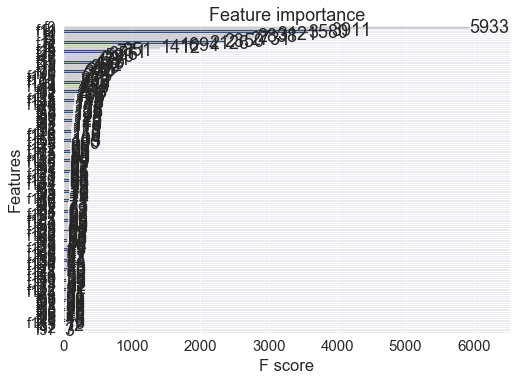

In [86]:
xgb.plot_importance(final_gb)

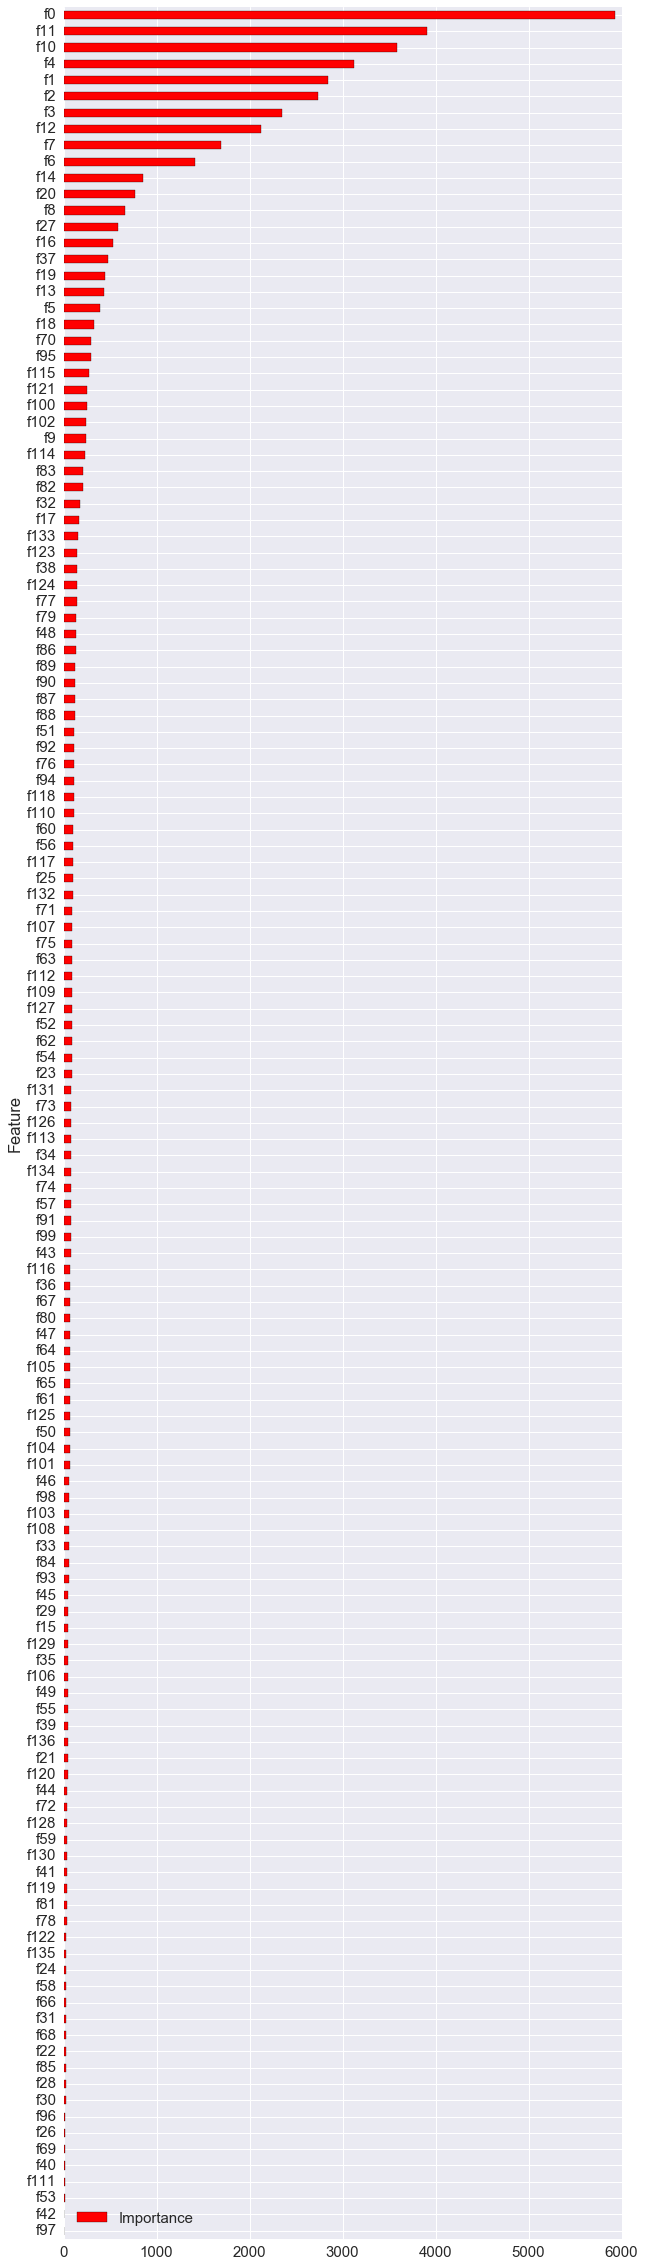

In [87]:
importances = final_gb.get_fscore()
importances
importance_frame = pd.DataFrame({'Importance': list(importances.values()), 'Feature': list(importances.keys())})
importance_frame.sort_values(by = 'Importance', inplace = True)
importance_frame.plot(kind = 'barh', x = 'Feature', figsize = (10,40), color = 'red')

In [99]:


#predict value on Validation set to check the perfomance 
validatemat=xgb.DMatrix(validate)
y_pred_validate = final_gb.predict(validatemat)

#predict value on actual test set 
new_test.rename(columns={'No_Years_employed_< 1 year': 'No_Years_employed_Less_than_1_year'},inplace=True)
testdmat = xgb.DMatrix(new_test)
y_pred = final_gb.predict(testdmat) # Predict using our testdmat



In [90]:
from sklearn.metrics import mean_squared_error
def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    rmse = np.sqrt(mean_squared_error(y_true, y_predict))
    # Return the rmse
    return rmse

In [91]:
#check performance metric rmse on validation to make sure model is not overfitting on training set and we do a bias variance trade-off 
performance_metric(Truth_validate,y_pred_validate)

0.018802085821953189

In [19]:
x = np.random.rand(100, 5)
training_idx = np.random.randint(new_train.shape[0], size=80)
test_idx = np.random.randint(new_train.shape[0], size=20)
training_rf, test_rf = x[training_idx,:], new_train[test_idx,:]

IndexError: index 240166 is out of bounds for axis 0 with size 100

In [100]:
#write prediction to a csv file 
np.savetxt("StateFarm_xgboost.csv", y_pred, delimiter=",")

In [13]:

#Random Forest Regressor

feature_cols = [col for col in new_train.columns if col not in ['Interest_Rate']]
X_train_rf = new_train[feature_cols]
X_test_rf = new_test[new_test.columns.values]
y = np.asarray(new_train['Interest_Rate'], dtype="|S6")
#y = list(new_train.Interest_Rate.values)
clf = ensemble.RandomForestRegressor(oob_score = True ,n_jobs = -1,random_state =1)
clf.fit(X_train_rf, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=-1, oob_score=True, random_state=1,
           verbose=0, warm_start=False)

In [15]:
rf_pred=clf.predict(X_test_rf)
np.savetxt("Statefarm_rf.csv", rf_pred, delimiter=",")